# Importing Labraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

**Improting Data**

In [24]:
df = pd.read_csv('/kaggle/input/mosquito-indicator-in-seoul-korea/mosquito_Indicator.csv')

**Checking Data**

In [25]:
df.head()

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1342 non-null   object 
 1   mosquito_Indicator  1342 non-null   float64
 2   rain(mm)            1342 non-null   float64
 3   mean_T(℃)           1342 non-null   float64
 4   min_T(℃)            1342 non-null   float64
 5   max_T(℃)            1342 non-null   float64
dtypes: float64(5), object(1)
memory usage: 63.0+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mosquito_Indicator,1342.0,251.991803,295.871336,0.0,5.5,91.9,480.400,1000.0
rain(mm),1342.0,3.539866,13.868106,0.0,0.0,0.0,0.400,144.5
mean_T(℃),1342.0,14.166021,10.943990,-14.8,4.5,16.5,23.300,33.7
min_T(℃),1342.0,10.005663,11.109489,-17.8,0.3,11.5,19.500,30.3
max_T(℃),1342.0,19.096870,11.063394,-10.7,9.3,21.9,28.175,39.6


# Data Cleaning

**Changing the data type of date from string to date**

In [28]:
df['date'] = pd.to_datetime(df['date'])

**Checking for Null Values**

In [29]:
df.isnull().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

# Explanatory Data Analysis

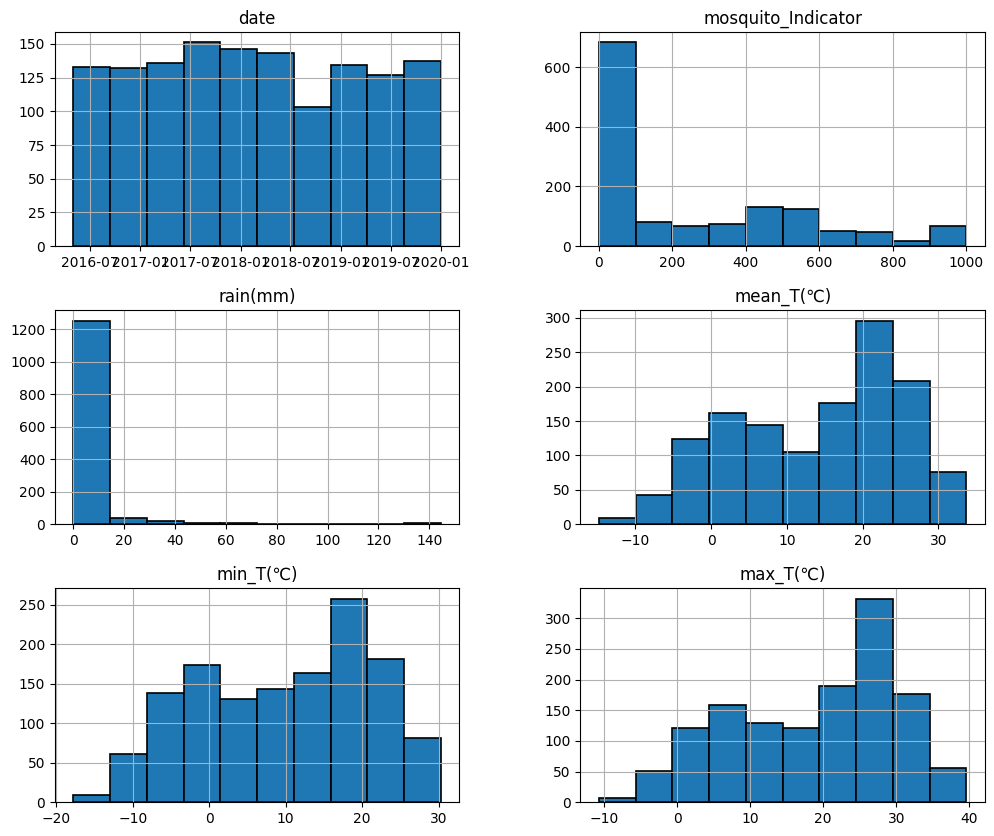

In [30]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

**Line diagram of showing the trend of mosquitoes indicator**

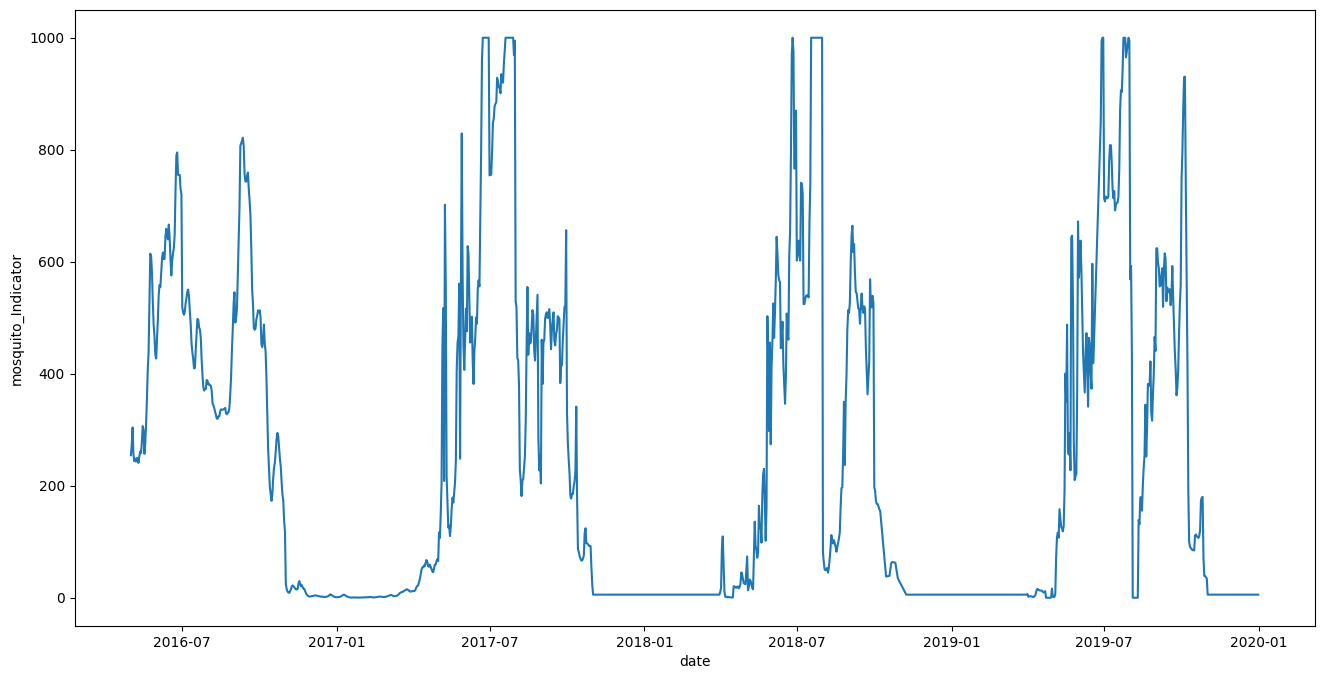

In [31]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x="date", y="mosquito_Indicator")
plt.show()

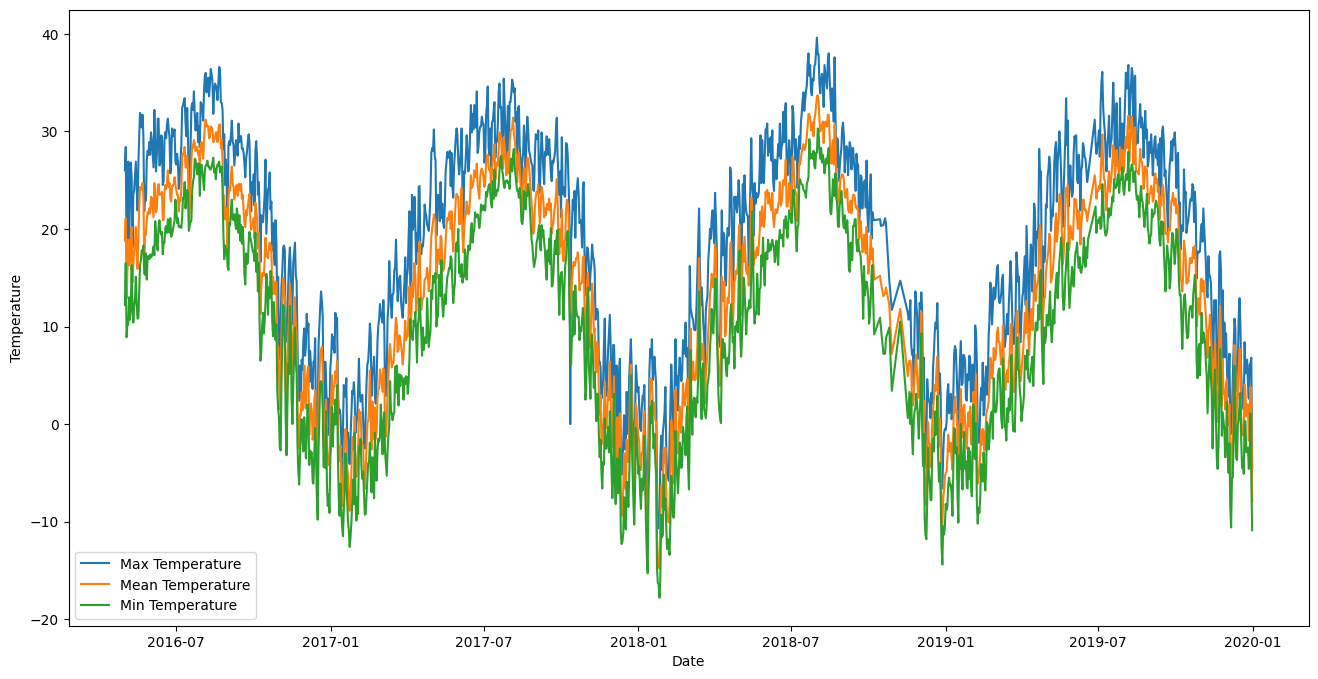

In [32]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='date', y='max_T(℃)', label='Max Temperature')
sns.lineplot(data=df, x='date', y='mean_T(℃)', label='Mean Temperature')
sns.lineplot(data=df, x='date', y='min_T(℃)', label='Min Temperature')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

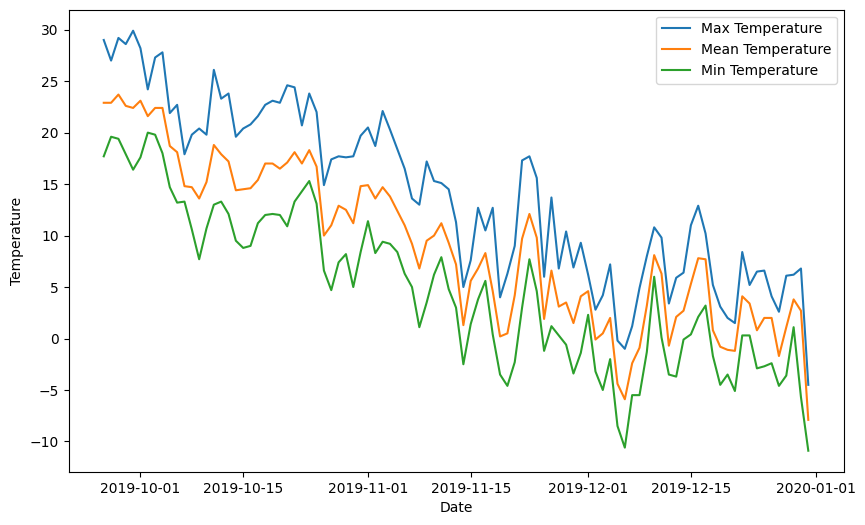

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df.tail(100), x='date', y='max_T(℃)', label='Max Temperature')
sns.lineplot(data=df.tail(100), x='date', y='mean_T(℃)', label='Mean Temperature')
sns.lineplot(data=df.tail(100), x='date', y='min_T(℃)', label='Min Temperature')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

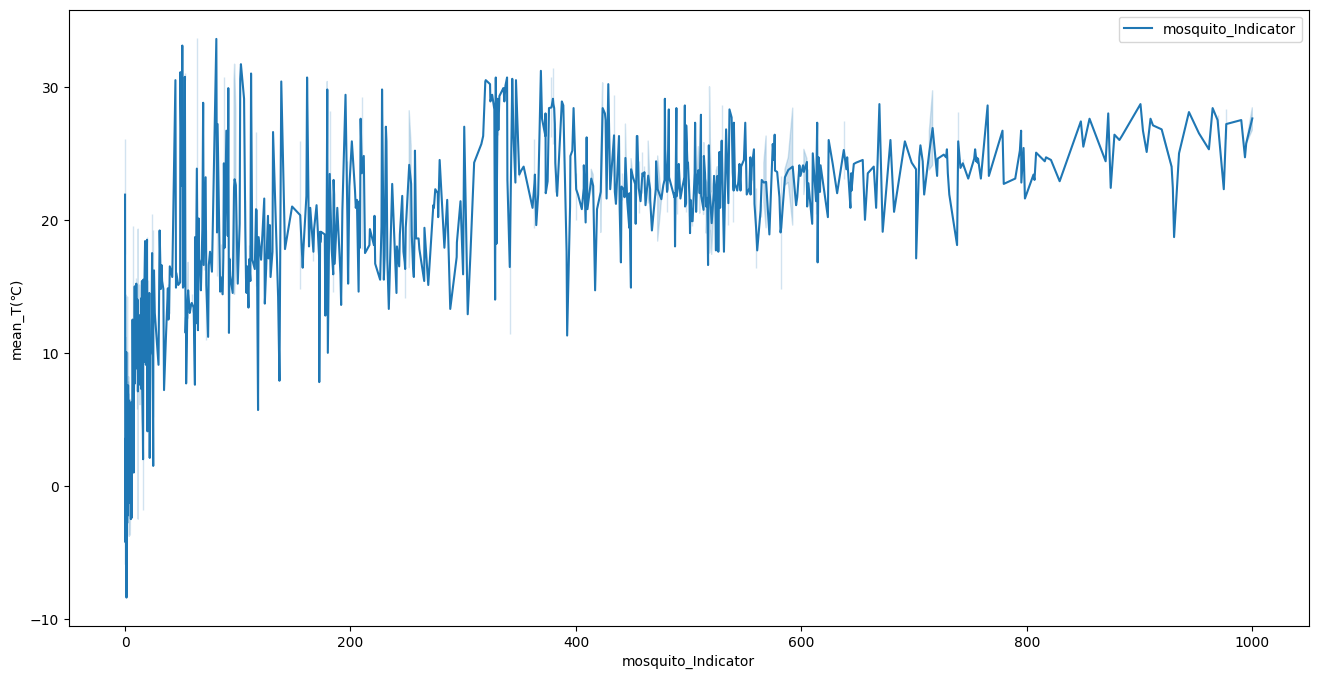

In [34]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='mosquito_Indicator', y='mean_T(℃)', label='mosquito_Indicator')

plt.xlabel('mosquito_Indicator')
plt.ylabel('mean_T(℃)')
plt.legend()
plt.show()

**Correlation between the factors**

<Axes: >

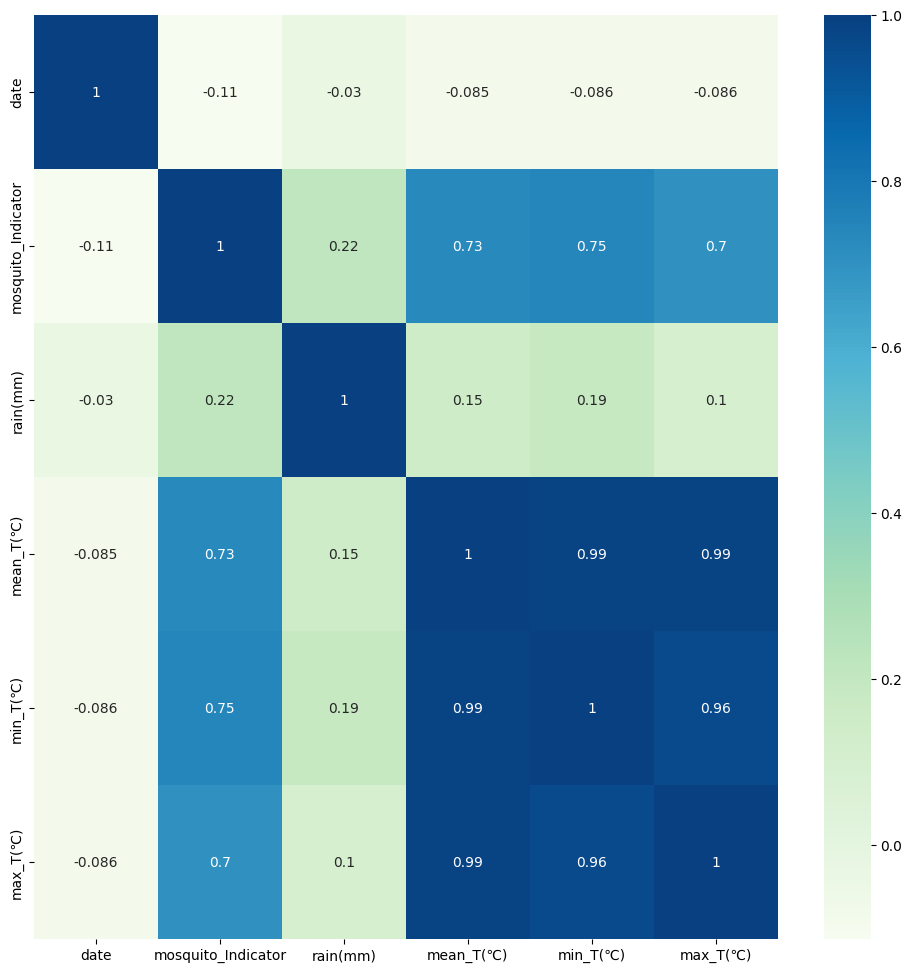

In [35]:
#Calculating Correlation
corr=df.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="GnBu")

In [36]:
df_max_dates = df.loc[df['mosquito_Indicator'] == df['mosquito_Indicator'].max()]
df_max_dates.head(10)

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
418,2017-06-23,1000.0,0.0,26.7,21.3,34.1
419,2017-06-24,1000.0,3.5,24.5,21.5,27.8
420,2017-06-24,1000.0,3.5,24.5,21.5,27.8
421,2017-06-25,1000.0,1.5,23.8,21.0,28.4
422,2017-06-26,1000.0,29.0,23.1,20.1,29.9
423,2017-06-26,1000.0,29.0,23.1,20.1,29.9
424,2017-06-27,1000.0,0.0,25.2,20.8,30.5
425,2017-06-28,1000.0,0.0,26.0,22.5,30.5
426,2017-06-29,1000.0,0.0,26.2,21.9,31.5
427,2017-06-30,1000.0,0.0,25.9,22.2,30.9


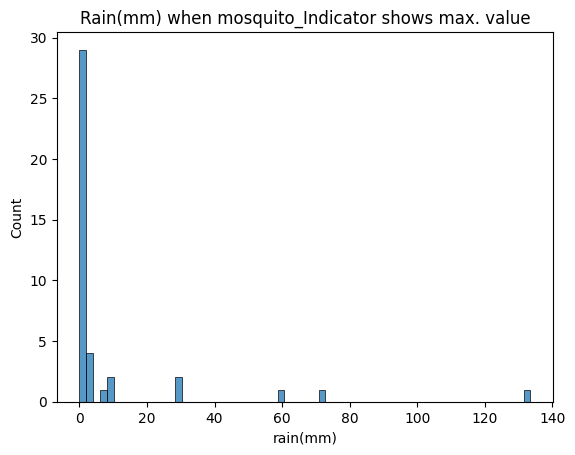

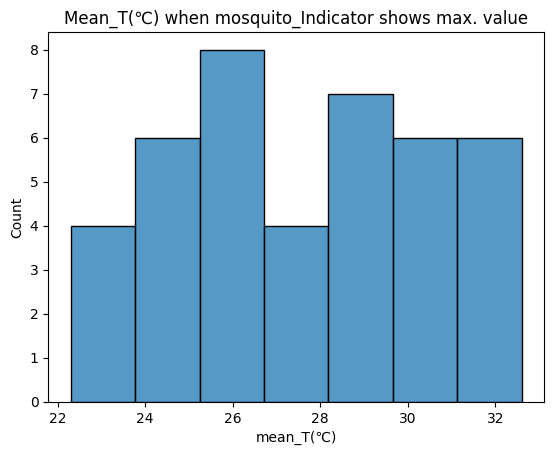

In [37]:
g1 = sns.histplot(df_max_dates['rain(mm)'])
g1.set(title = 'Rain(mm) when mosquito_Indicator shows max. value')
plt.show()

g2 = sns.histplot(df_max_dates['mean_T(℃)'])
g2.set(title = 'Mean_T(℃) when mosquito_Indicator shows max. value')
plt.show()

In [38]:
df['year'] = df['date'].dt.year
df_grouped = df.groupby(by='year').mean().reset_index()
df_grouped.head()

,year,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016,2016-08-30 04:27:46.115702528,344.623140,3.412397,18.136777,14.110331,23.000826
1,2017,2017-07-05 12:40:49.484536064,263.859021,4.533247,13.526289,9.338144,18.468814
2,2018,2018-06-17 01:54:52.307692288,209.302849,3.631624,13.031909,8.925071,17.934473
3,2019,2019-07-03 15:17:27.091412736,218.647091,2.468421,13.294460,9.022161,18.285042


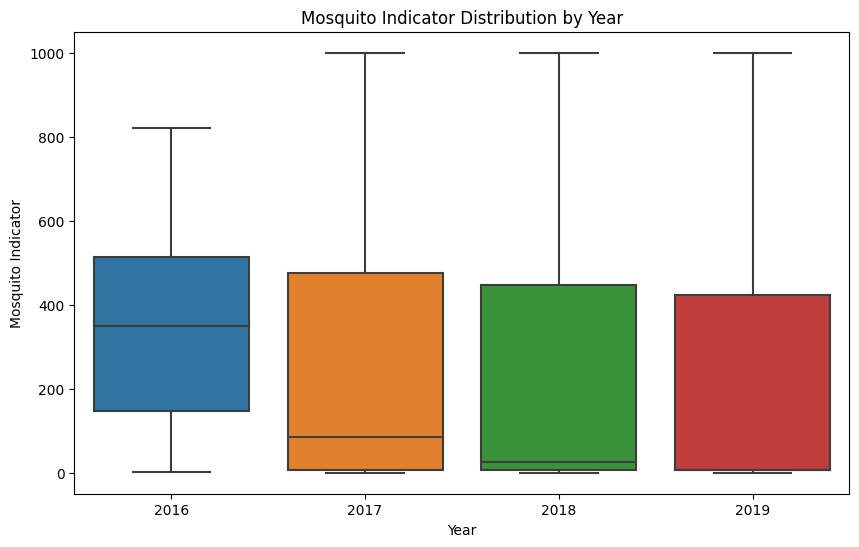

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='mosquito_Indicator')
plt.xlabel('Year')
plt.ylabel('Mosquito Indicator')
plt.title('Mosquito Indicator Distribution by Year')
plt.show()

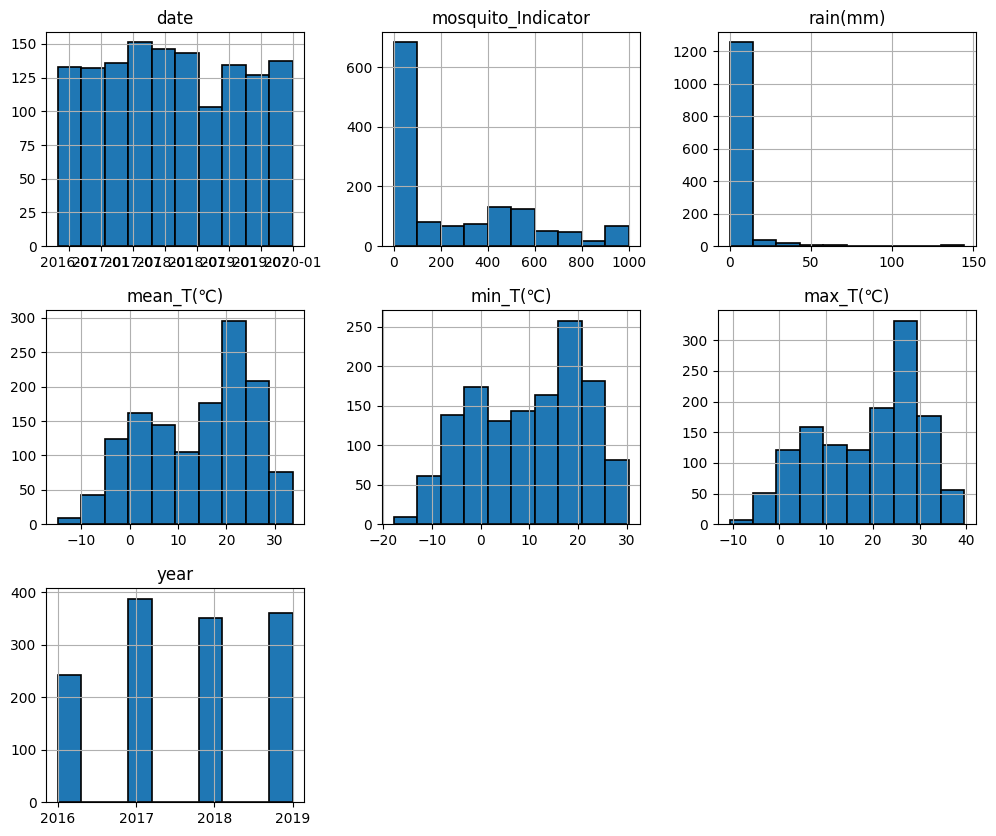

In [40]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

# ML

In [41]:
from sklearn.model_selection import train_test_split # 데이터 분할 모듈

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 

In [42]:
# 학습용 문제, 학습용 정답, 테스트용 문제, 테스용 정답으로 데이터를 4개로 쪼개기, split_4_parts
train, test = train_test_split(df, train_size = 0.8)

# 학습용 문제와 정답
train_X = train[['min_T(℃)']]
train_y = train.mosquito_Indicator

# 테스트용 문제와 정답
test_X = test[['min_T(℃)']] 
test_y = test.mosquito_Indicator

In [43]:
# 시험공부시키
DT = DecisionTreeRegressor()
DT.fit(train_X, train_y) #학습용 문제, 학습용 정답

# 테스트한(기말고사) 후 점수까지 계산하기
score = DT.score(test_X, test_y) #테스트 문제, 테스트 정답
print('Score:', format(score,'.3f')) # score의 의미: 정확하게 예측하면 1, 평균으로 예측하면 0, 더 못 예측하면 음수

Score: 0.427


In [44]:
# 시험공부시키
KN = KNeighborsRegressor()
KN.fit(train_X, train_y) #학습용 문제, 학습용 정답

# 테스트한(기말고사) 후 점수까지 계산하기
score = KN.score(test_X, test_y) #테스트 문제, 테스트 정답
print('Score:', format(score,'.3f')) # score의 의미: 정확하게 예측하면 1, 평균으로 예측하면 0, 더 못 예측하면 음수

Score: 0.560


In [45]:
# 시험공부시키
RF = RandomForestRegressor()
RF.fit(train_X, train_y) #학습용 문제, 학습용 정답

# 테스트한(기말고사) 후 점수까지 계산하기
score = RF.score(test_X, test_y) #테스트 문제, 테스트 정답
print('Score:', format(score,'.3f')) # score의 의미: 정확하게 예측하면 1, 평균으로 예측하면 0, 더 못 예측하면 음수

Score: 0.502


In [46]:
LR = LinearRegression()
LR.fit(train_X, train_y)

# 테스트한(기말고사) 후 점수까지 계산하기
score = LR.score(test_X, test_y) #테스트 문제, 테스트 정답
print('Score:', format(score,'.3f')) # score의 의미: 정확하게 예측하면 1, 평균으로 예측하면 0, 더 못 예측하면 음수

Score: 0.573


In [47]:
# 시험공부시키
GB = GradientBoostingRegressor()
GB.fit(train_X, train_y) #학습용 문제, 학습용 정답

# 테스트한(기말고사) 후 점수까지 계산하기
score = GB.score(test_X, test_y) #테스트 문제, 테스트 정답
print('Score:', format(score,'.3f')) # score의 의미: 정확하게 예측하면 1, 평균으로 예측하면 0, 더 못 예측하면 음수

Score: 0.554
